In [416]:
import scipy.special as sc_sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [417]:
# Load train dataset
with open('../data/mnist/demo/mnist_train_100.csv', 'r') as f_train:
    train_data_demo = [line.rstrip() for line in f_train]

In [418]:
image_2 = train_data_demo[1].split(',')
print(np.asfarray(image_2[1:]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

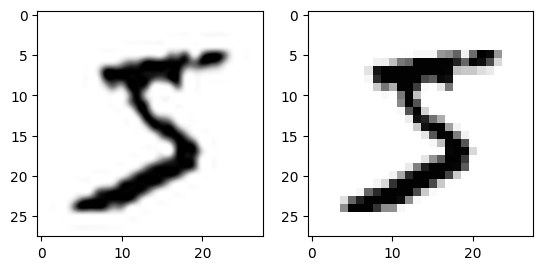

In [419]:
# values = list(map(int, lines[0].split(',')))
all_values = train_data_demo[0].split(',')

# np.asfarray: str values -> int values in array
image_array_1 = np.asfarray(all_values[1:]).reshape((28, -1))

# plt.imshow -> value => color of pixel
figure, axis = plt.subplots(1, 2)
axis[0].imshow(image_array_1, cmap='Greys', interpolation='lanczos')
axis[1].imshow(image_array_1, cmap='Greys', interpolation=None)
plt.show()

In [420]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [421]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [422]:
# Example. Assignment of best score for marker.
onodes = 10
targets = np.zeros(onodes) + 0.01

# all_values[0] = 5 -> targets[5] = 0.01, change on 0.99 => target[5] = 0.99; best score for 5
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [423]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes

        self.lr = learning_rate

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.activation = lambda x: sc_sp.expit(x)

        pass

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), hidden_outputs.T)
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), inputs.T)

        pass

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)

        return final_outputs

In [424]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

In [425]:
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [426]:
for record in train_data_demo:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01

    targets[int(all_values[0])] = 0.99

    n.train(inputs, targets)  # !!!

    pass

In [427]:
# Load test dataset

with open('../data/mnist/demo/mnist_test_10.csv', 'r') as f_test:
    test_data_demo = [test.rstrip() for test in f_test]

In [428]:
all_values = test_data_demo[0].split(',')
print(all_values)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

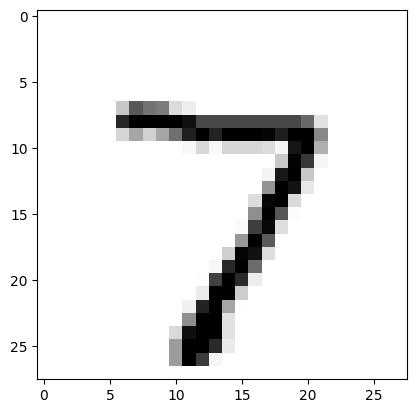

In [429]:
image_array = np.asfarray(all_values[1:]).reshape(28, -1)
plt.imshow(image_array, cmap='Greys', interpolation=None)
plt.show()

In [430]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.08636609],
       [0.00341758],
       [0.0210412 ],
       [0.2098001 ],
       [0.04172371],
       [0.04584925],
       [0.00334083],
       [0.93197989],
       [0.03173745],
       [0.01676688]])

In [431]:
# Testing of NeuralNetwork

# logs
scorecard = []

for record in test_data_demo:
    all_values = record.split(',')

    # True marker
    correct_label = int(all_values[0])
    print('True marker:', correct_label)

    # Scaling values
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # Network survey
    outputs = n.query(inputs)

    # Max value
    label = np.argmax(outputs)
    print('outputs:', outputs)
    print('Response of NN:', label)

    # Add in scorecard
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

    pass

True marker: 7
outputs: [[0.08636609]
 [0.00341758]
 [0.0210412 ]
 [0.2098001 ]
 [0.04172371]
 [0.04584925]
 [0.00334083]
 [0.93197989]
 [0.03173745]
 [0.01676688]]
Response of NN: 7
True marker: 2
outputs: [[0.22351793]
 [0.13678654]
 [0.07062752]
 [0.27595866]
 [0.00981503]
 [0.05998821]
 [0.13642761]
 [0.01039755]
 [0.0999464 ]
 [0.00348477]]
Response of NN: 3
True marker: 1
outputs: [[0.01713119]
 [0.96188363]
 [0.02173969]
 [0.03007245]
 [0.02720197]
 [0.05452143]
 [0.01998662]
 [0.03435855]
 [0.08616834]
 [0.00741992]]
Response of NN: 1
True marker: 0
outputs: [[0.84117966]
 [0.00349495]
 [0.01307497]
 [0.0188511 ]
 [0.01702492]
 [0.00403563]
 [0.0396012 ]
 [0.34324148]
 [0.0074126 ]
 [0.00174686]]
Response of NN: 0
True marker: 4
outputs: [[0.02706012]
 [0.00207628]
 [0.04675984]
 [0.02190396]
 [0.79651159]
 [0.02074015]
 [0.00816638]
 [0.30704117]
 [0.0237483 ]
 [0.00369411]]
Response of NN: 4
True marker: 1
outputs: [[0.0111331 ]
 [0.97860534]
 [0.03383257]
 [0.0520762 ]
 [0.0

In [432]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [433]:
# Transformation in numpy array
scorecard_array = np.asarray(scorecard)
scorecard_array

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [434]:
print('Effectiveness:', scorecard_array.sum() / scorecard_array.size)

Effectiveness: 0.6


In [435]:
# Train and test datasets (full)
with open('../data/mnist/mnist_train.csv', 'r') as f_train:
    train_data = [line.rstrip() for line in f_train]

In [436]:
with open('../data/mnist/mnist_test.csv', 'r') as f_test:
    test_data = [line.rstrip() for line in f_test]

In [437]:
for record in train_data:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01

    targets[int(all_values[0])] = 0.99

    n.train(inputs, targets)  # !!!

    pass

In [438]:
# Testing of NeuralNetwork

# logs
scorecard = []

for record in test_data:
    all_values = record.split(',')

    # True marker
    correct_label = int(all_values[0])

    # Scaling values
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # Network survey
    outputs = n.query(inputs)

    # Max value
    label = np.argmax(outputs)

    # Add in scorecard
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

    pass

In [439]:
scorecard_array = np.asarray(scorecard)
print('Effectiveness:', scorecard_array.sum() / scorecard_array.size)

Effectiveness: 0.9476
